In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

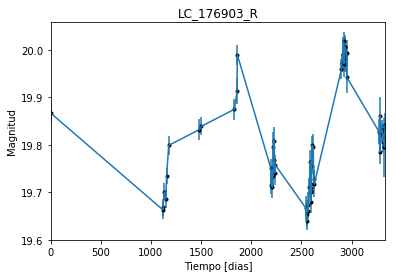

In [2]:
data = np.genfromtxt('LC_176903_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176903_R')
plt.savefig("LC_176903_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

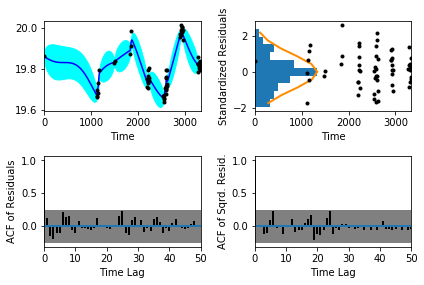

In [5]:
sample.assess_fit()

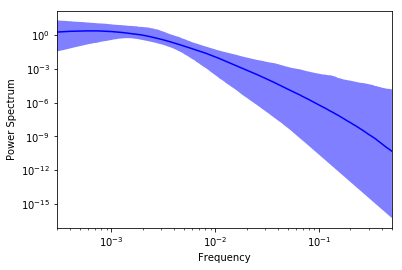

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

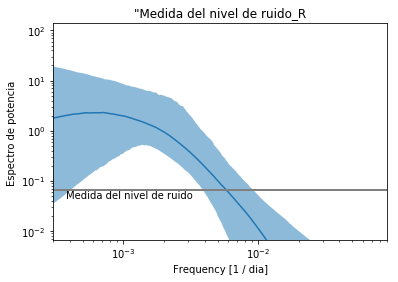

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176903_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176903_R')

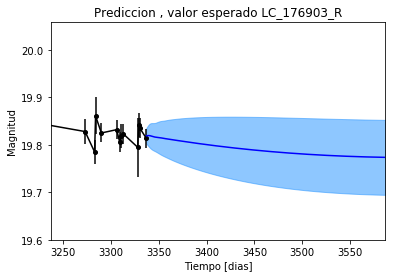

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176903_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176903_R')

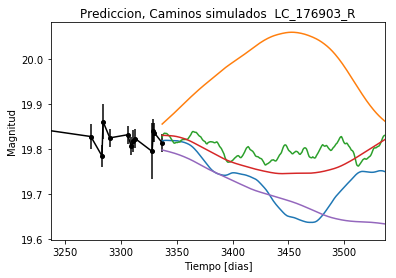

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176903_R')

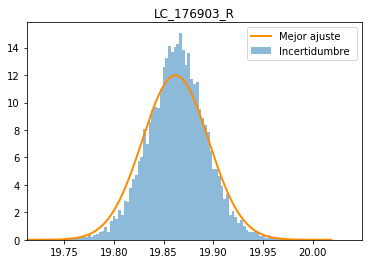

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_176903_R')
plt.savefig("Mejor_ajuste_LC_176903_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176903_R')

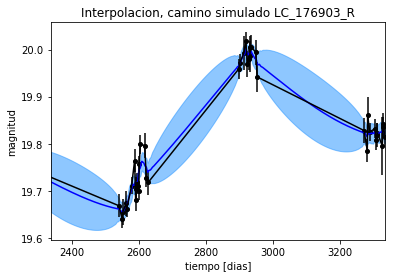

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_R')

Text(0.5,1,'Interpolacion, camino simulado LC_176903_R')

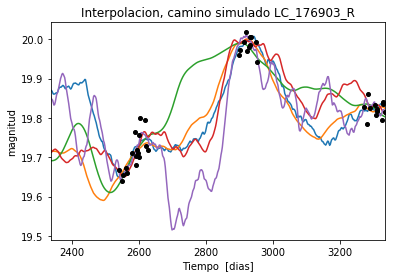

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 331.381025025
Median: 0.00673832354839
Standard deviation: 0.171456061524
68% credibility interval: [ 0.00071409  0.10471052]
95% credibility interval: [  3.46734852e-04   7.08196105e-01]
99% credibility interval: [  3.08626247e-04   9.21818671e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 103.975880043
Median: 0.00164339700485
Standard deviation: 0.101111056927
68% credibility interval: [ 0.00051472  0.0293587 ]
95% credibility interval: [ 0.00032753  0.3232556 ]
99% credibility interval: [  3.06422550e-04   7.63443656e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 290.343368466
Median: 0.0153434799052
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1248.70830904
Median: 140.673804739
Standard deviation: 1.74120079914
68% credibility interval: [ 138.77486493  142.01530421]
95% credibility interval: [ 136.18333713  142.97144193]
99% credibility interval: [ 134.25745865  143.34789436]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 560.609931191
Median: 0.609093821094
Standard deviation: 2.03681909742
68% credibility interval: [ 0.06406701  3.54975176]
95% credibility interval: [ 0.0164262   6.90307504]
99% credibility interval: [ 0.01019785  9.68674517]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 337.593170102
Median: 0.183977235834
Standard deviation: 8.26528505169
68% credibility interval: [ 0.00672177  5.27682094]
95% credibility interval: [  6.94031574e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2992.44170339
Median: 4.77429131077e-05
Standard deviation: 4.64743238301e+146
68% credibility interval: [  9.32916505e-55   3.20861724e+76]
95% credibility interval: [  1.17536150e-090   1.31177790e+130]
99% credibility interval: [  1.02455473e-112   1.03071092e+140]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3160.07852157
Median: 19.81416229
Standard deviation: 0.0415227013602
68% credibility interval: [ 19.78084058  19.84742566]
95% credibility interval: [ 19.72982391  19.90024779]
99% credibility interval: [ 19.68187967  19.95250766]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 276.702064122
Median: 0.00308659513817
Standard deviation: 0.230296097558
68% credibility interval: [ 0.          0.27546513]
95% credibility interval: [ 0.         0.8431959]
99% credibility interval: [ 0.          0.95797749]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 276.702064122
Median: 0.00308659513817
Standard deviation: 0.230296097558
68% credibility interval: [ 0.          0.27546513]
95% credibility interval: [ 0.         0.8431959]
99% credibility interval: [ 0.          0.95797749]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 594.303010147
Median: 0.0
Standard deviation: 0.000782881101992
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1248.70830904
Median: 140.673804739
Standard deviation: 1.74120079914
68% credibility interval: [ 138.77486493  142.01530421]
95% credibility interval: [ 136.18333713  142.97144193]
99% credibility interval: [ 134.25745865  143.34789436]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2632.80360724
Median: 0.0114208143833
Standard deviation: 0.0123710539809
68% credibility interval: [ 0.00692181  0.02050903]
95% credibility interval: [ 0.00484182  0.0416524 ]
99% credibility interval: [ 0.00407096  0.0714794 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 858.759905748
Median: 1.13066098211
Standard deviation: 0.194884385518
68% credibility interval: [ 0.94635781  1.32372093]
95% credibility interval: [ 0.80270109  1.56116235]
99% credibility interval: [ 0.73019756  1.73527374]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 405.582452972
Median: 3.05114394367e-06
Standard deviation: 0.0512990008503
68% credibility interval: [  1.99378010e-80   2.06326534e-03]
95% credibility interval: [  1.63110498e-134   4.49371573e-002]
99% credibility interval: [  6.29555219e-145   2.88696937e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 331.381025025
Median: (-0.0423381355143-0.0163259141329j)
Standard deviation: 1.80397979333
68% credibility interval: [-0.65791561+0.j         -0.00448678-0.51545066j]
95% credibility interval: [ -4.44972736e+00-2.87399369j  -2.17859933e-03-0.77634936j]
99% credibility interval: [ -5.79195753e+00+0.j          -1.93915590e-03-0.00459476j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 103.975880043
Median: (-0.0103257679147+0.842823972949j)
Standard deviation: 1.58031464255
68% credibility interval: [-0.18446614+0.j         -0.00323407+0.00583922j]
95% credibility interval: [-2.03107486+4.46636418j -0.00205793+0.44814495j]
99% credibility interval: [ -4.79685796e+00 +2.88478035e+00j  -1.92530966e-03 +4.81721806e-05j]
P